# Load libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [2]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [3]:
remote_link = "https://github.com/phpmyadmin/phpmyadmin"
local_link = "repo/phpmyadmin"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [4]:
repo = Repo(local_link)
fixing_commit = "79089c9bc02c82c15419fd9d6496b8781ae08a5a"
affected_file = "tbl_gis_visualization.php"

# Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [5]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 79089c9bc02c82c15419fd9d6496b8781ae08a5a
Author: Dieter Adriaenssens <ruleant@users.sourceforge.net>
Date:   Sun Mar 31 23:11:10 2013 +0200

    fix XSS reported by Janek Vind


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [6]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [7]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [8]:
df.head()

,Commit,Author
0,15644,Marc Delisle <marc@infomarc.info>
1,12330,Michal Čihař <michal@cihar.com>
2,6392,Madhura Jayaratne <madhura.cj@gmail.com>
3,2862,Michal Čihař <mcihar@suse.cz>
4,2710,Weblate <noreply@weblate.org>


## Top 10 most active developers in the project

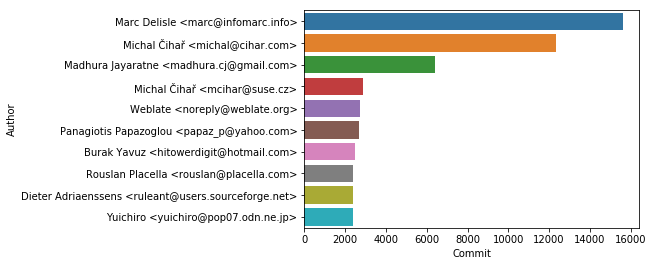

In [9]:
sns.barplot(y='Author', x="Commit", data=df[:10])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [10]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/tbl_gis_visualization.php b/tbl_gis_visualization.php
index 0811d01aeb..bd95b2e6c7 100644
--- a/tbl_gis_visualization.php
+++ b/tbl_gis_visualization.php
@@ -110,7 +110,7 @@ $visualization = PMA_GIS_visualizationResults($data, $visualizationSettings, $fo
 <?php echo PMA_generate_common_hidden_inputs($url_params); ?>
 <fieldset>
     <legend><?php echo __('Display GIS Visualization'); ?></legend>
-    <div id="placeholder" style="width:<?php echo($visualizationSettings['width']); ?>px;height:<?php echo($visualizationSettings['height']); ?>px;">
+    <div id="placeholder" style="width:<?php echo(htmlspecialchars($visualizationSettings['width'])); ?>px;height:<?php echo(htmlspecialchars($visualizationSettings['height'])); ?>px;">
         <?php echo $visualization; ?>
     </div>
     <div id="openlayersmap"></div>
@@ -202,4 +202,4 @@ $visualization = PMA_GIS_visualizationResults($data, $visualizationSettings, $fo
  */
 require './libraries/footer.inc.php';
 
-?>
\ No newline

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [11]:
blame_data = repo.git.blame("-L113,+1", fixing_commit + "^", "--", affected_file).splitlines()
for line in blame_data:
    print(line)

322494d784f (Madhura Jayaratne 2011-06-17 17:42:18 +0530 113)     <div id="placeholder" style="width:<?php echo($visualizationSettings['width']); ?>px;height:<?php echo($visualizationSettings['height']); ?>px;">


# Show all the commit history between two commits

Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

In [12]:
last_commit = blame_data[0].strip().split()[0]
log_data = repo.git.log("--oneline", last_commit + ".." + fixing_commit + "^").splitlines()
print("Number of commits in between:", len(log_data))

Number of commits in between: 32168


In [13]:
log_data

['93070c081c Use HTML5 DOCTYPE',
 'b6d2403339 ChangeLog entry for bug #3705 Attempt to open trigger for edit gives NULL',
 "398d1415cd Merge remote-tracking branch 'origin/QA_3_5' into QA_3_5",
 '1a0480dbe8 Translated using Weblate (Korean)',
 'ca59b5965d Translated using Weblate (Catalan)',
 '45af9e1869 Update rte_triggers.lib.php',
 'a776aa5743 Translated using Weblate (Malay)',
 '9ce300ef7b Translated using Weblate (Catalan)',
 "8a2fcbd771 Merge remote-tracking branch 'origin/QA_3_5' into QA_3_5",
 '71e1f0e2c1 Translated using Weblate (Norwegian Bokmål)',
 'e7dbc50a19 Correctly detect older and newer Safari',
 "bac24e611d Merge remote-tracking branch 'origin/QA_3_5' into QA_3_5",
 '1c3044b23c Translated using Weblate (Swedish)',
 '4d651cae1a Translated using Weblate (Malay)',
 'f97b2ee8d2 Bug #3854 Incorrect header for Safari 6.0',
 'c6b535880e Translated using Weblate (Korean)',
 '2d2732da42 Translated using Weblate (French)',
 '9c7642c666 Translated using Weblate (Mongolian)',
 '7